<a href="https://colab.research.google.com/github/anesukafesu/data_preprocessing/blob/main/ml_pipeline_anesu_kafesu_data_preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Installation of liac-arff and importing libraries
!pip install liac-arff
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import arff
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler

  Preparing metadata (setup.py) ... done
  Created wheel for liac-arff: filename=liac_arff-2.5.0-py3-none-any.whl size=11716 sha256=fec8e9d58541f760c6248d4492ebb5a03220bdf49298e0d82bbeefaecc8bc242
  Stored in directory: /root/.cache/pip/wheels/5d/2a/9c/3895d9617f8f49a0883ba686326d598e78a1c2f54fe3cae86d
Successfully built liac-arff


# Data Processing Approach for Portfolio Project

## Project Title: Usizo

## Student Name: Anesu Kafesu

---

1. **Data Sources and Aggregation:**
  
   **Data sources**
   - [OpenML](https://www.openml.org/search?type=data&sort=runs&id=43454&status=active)
   - [UC Irvine](https://archive.ics.uci.edu/dataset/144/statlog+german+credit+data)

   **Data Aggregation**

   - In general, aggregating data from multiple sources is helpful if not necessary. It gives you more training data which leads to improved model performance.
   - However, to aggregate data, one must be able to produce a map between the features of one dataset to the features of another dataset. This should be done at least for the features that will be used for prediction. In this case, there was no obvious mapping between the datasets I found. Therefore, aggregation was impossible.
   - Secondly, care must be taken to ensure that the data is similar enough. In this case, the datasets are both credit datasets from Germany. Had it been data from another geographic region, with different currencies and purchasing powers, aggregating the data would have been detrimental.
   
   - In this case, while additional data would have been nice, it is not necessary nor possible to aggregate the datasets. Therefore, I will use the OpenML data for the rest of the assignment.





2. **Data Format Transformation:**
- Currently, the data is stored in .arff file. Pandas cannot read data in this file format, so it is necessary to use the liac-arff library, to parse the data into dataframe.


In [2]:
# Reading the data from ./credit_risk.arff
path_to_file = './credit.arff'
arff_data = arff.load(open(path_to_file, 'r'))

# Setting columns as these were not preset in the data
df = pd.DataFrame(arff_data['data'], columns=[attr[0] for attr in arff_data['attributes']])

# Printing the first few rows of the data
df.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


3. **Types of Data Handling:**
   - The cell below lists the types of data in the dataset. The objects are actually categorical data.
   - These categorical variables will require encoding so the model can train on them.
   - The rest of the columns are integers and floating point numbers and do not require encoding.
   - Of course the data will require normalisation/scaling later on.

In [5]:
# Display the basic information about the dataset
print("Data types:")
df.dtypes

Dataset Information:


,0
person_age,int64
person_income,int64
person_home_ownership,object
person_emp_length,float64
loan_intent,object
loan_grade,object
loan_amnt,int64
loan_int_rate,float64
loan_status,int64
loan_percent_income,float64


4. **Data Exploration:**

  **Summary**
    - The loan_status is strongly correlated with loan_percent_income, loan_grade, loan_int_rate, home_ownership and cb_default_on_file.
    - Loan Amounts: Loans average around $9,589 with a maximum of $35,000.
    - Loan Percent Income: Most loans represent a small fraction of the individual's income, averaging 17%.
    - Age: The majority of individuals are in their mid-20s. Outliers include very high ages up to 144 years.
    - Income: Average income is approximately $66,000. There are extreme outliers, with some incomes reaching $6,000,000.

dfset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  int64  
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  int64  
 5   loan_grade                  32581 non-null  int64  
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  int64  
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(9)
memory usage: 3.0 MB
None

Summary Statistics:
     

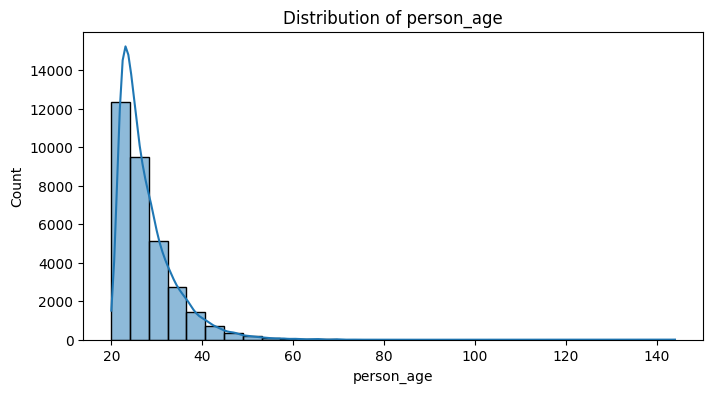

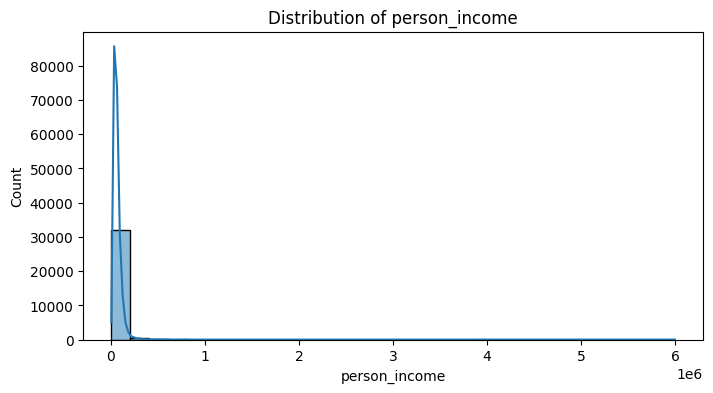

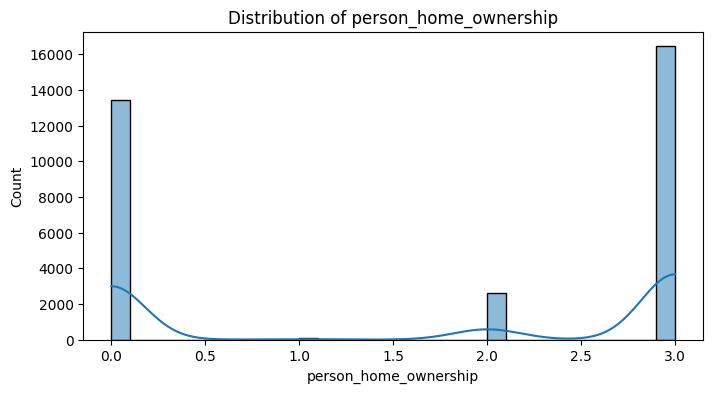

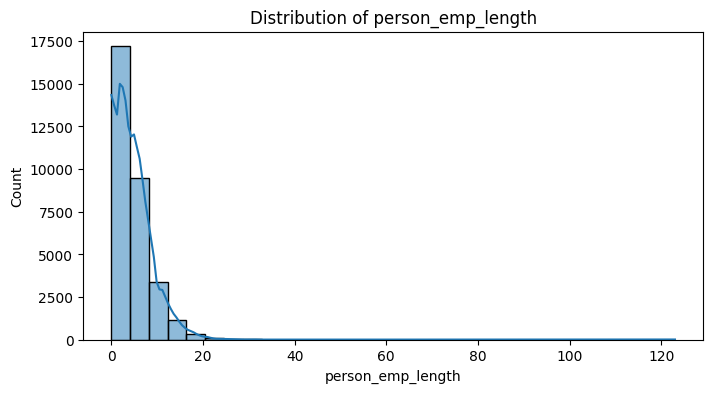

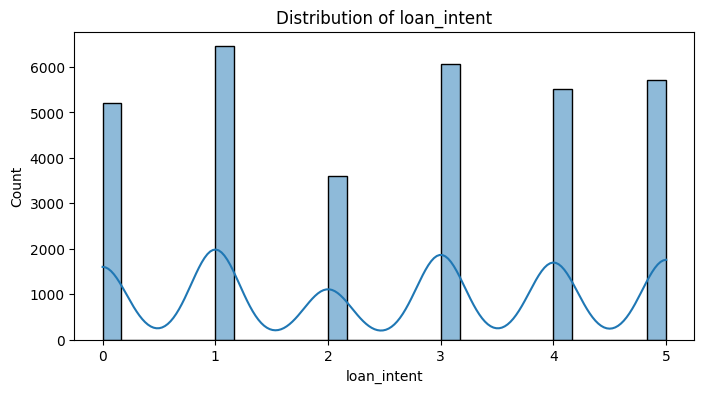

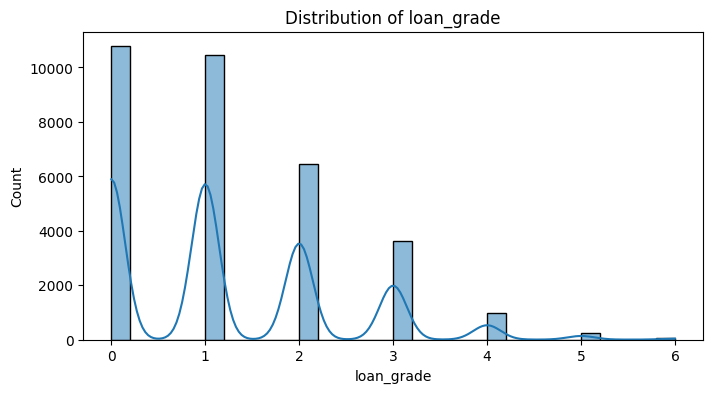

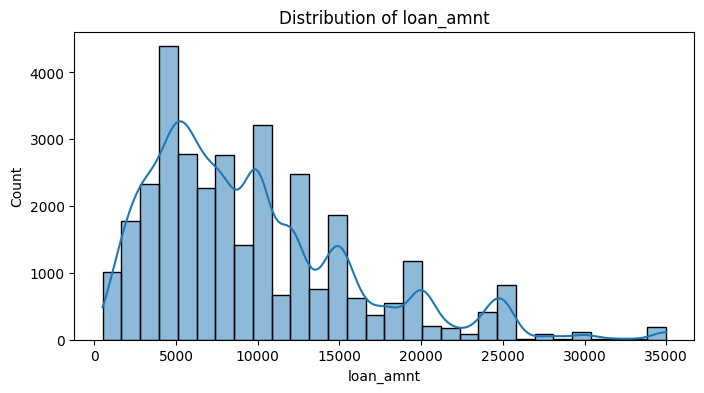

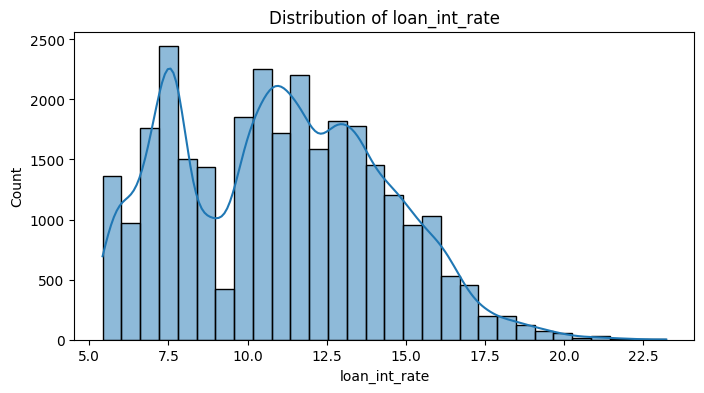

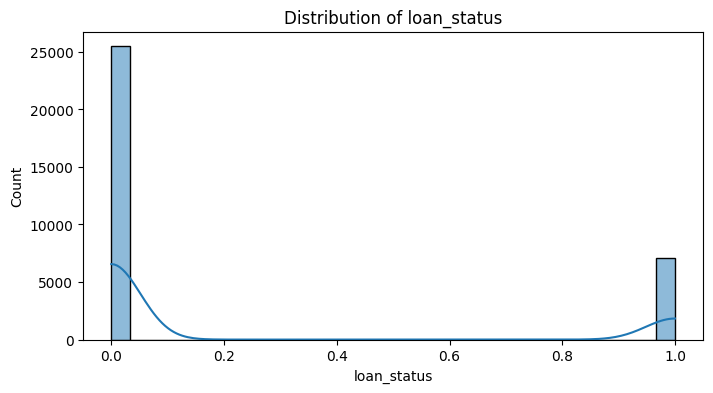

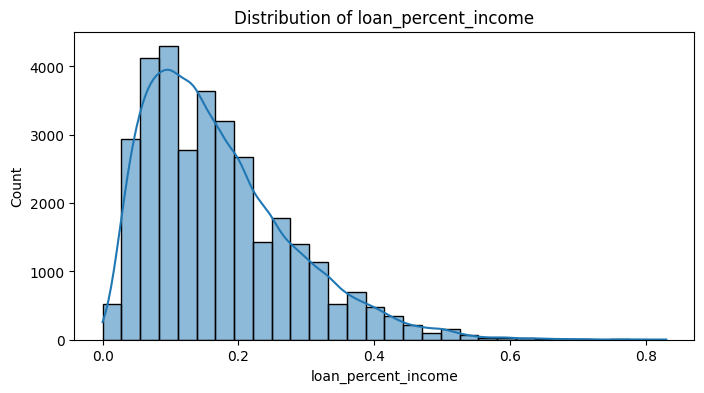

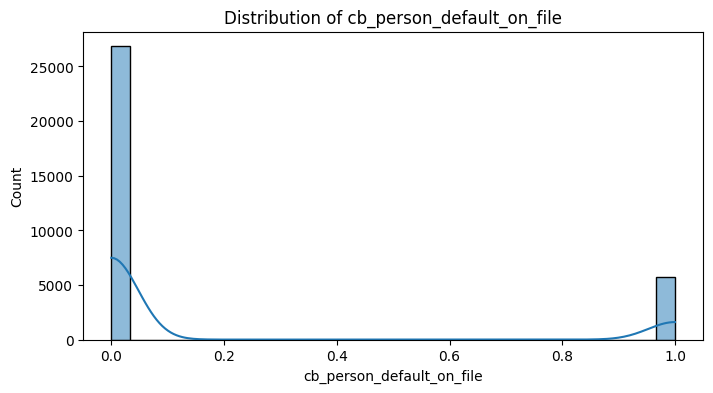

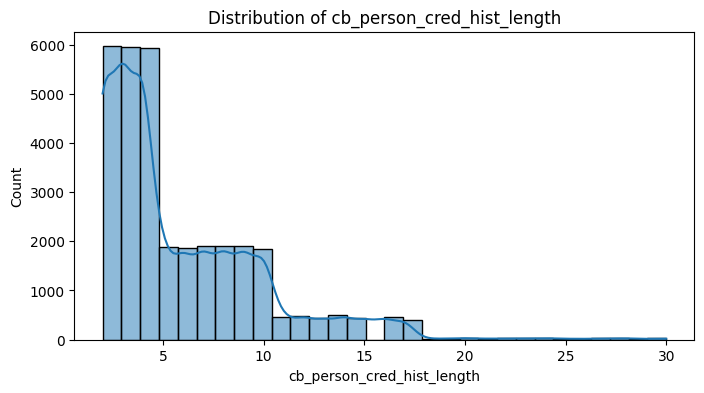

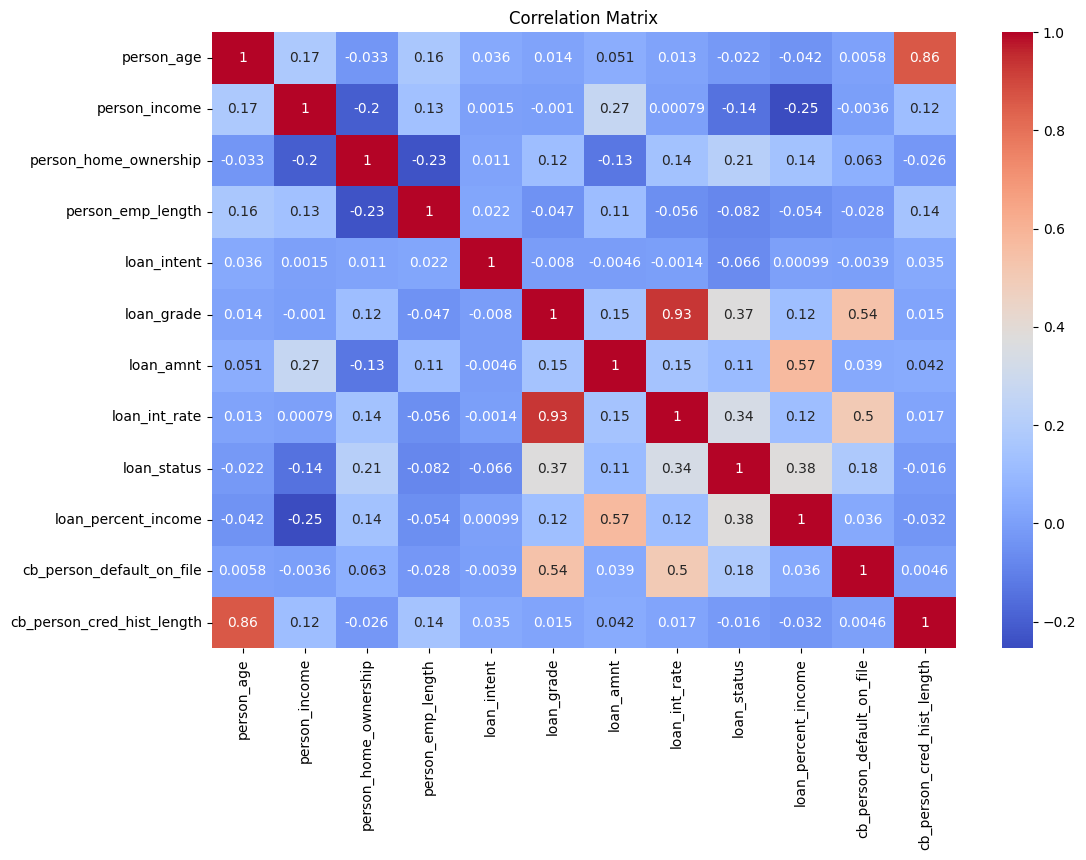

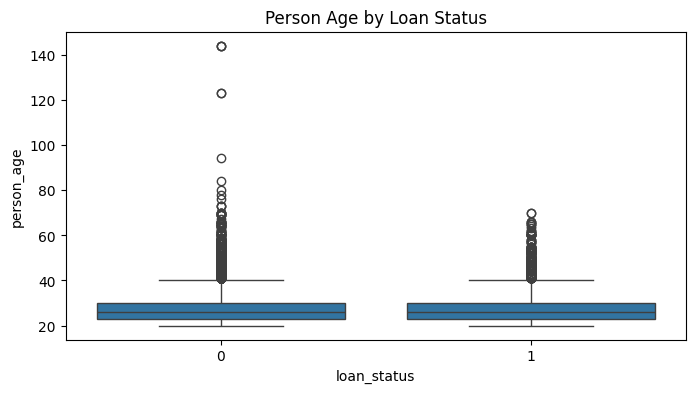

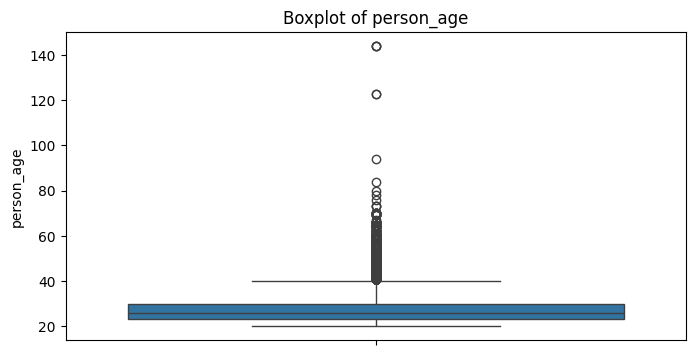

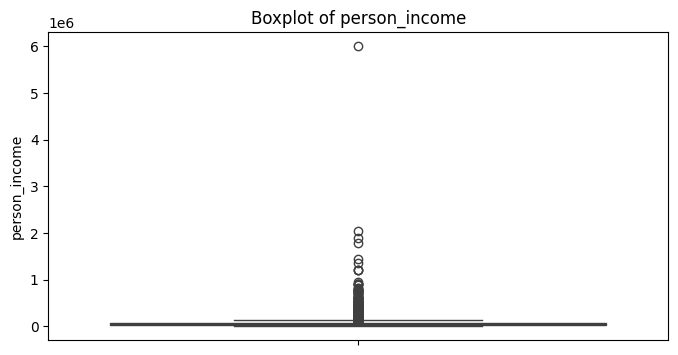

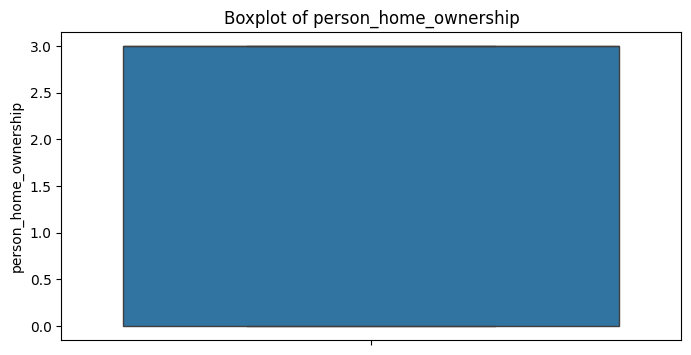

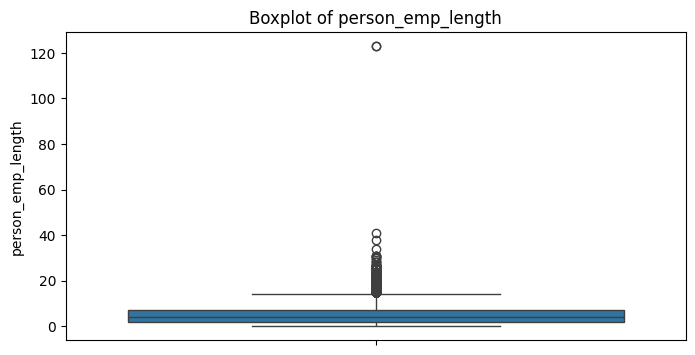

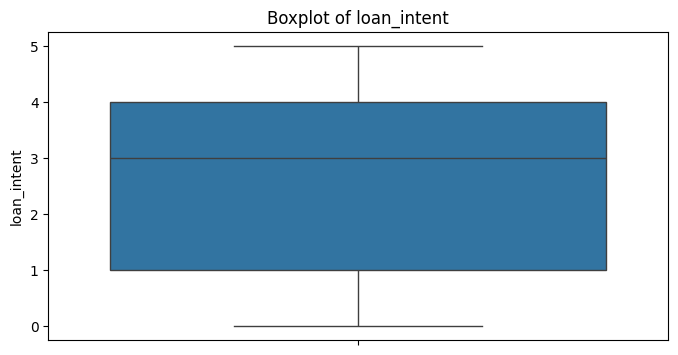

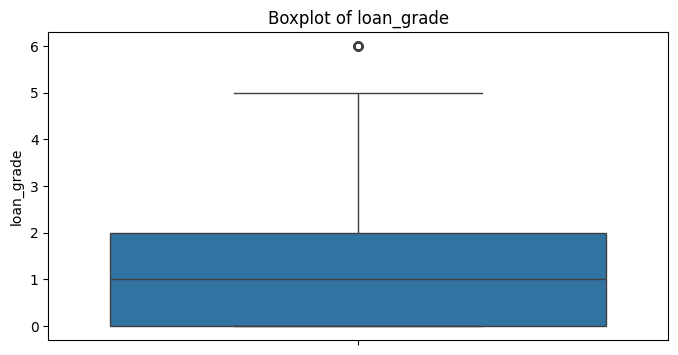

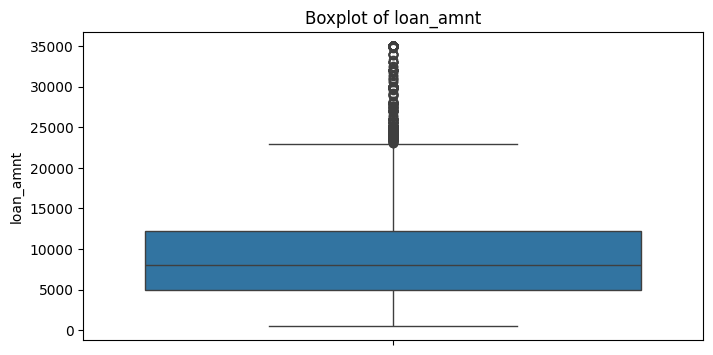

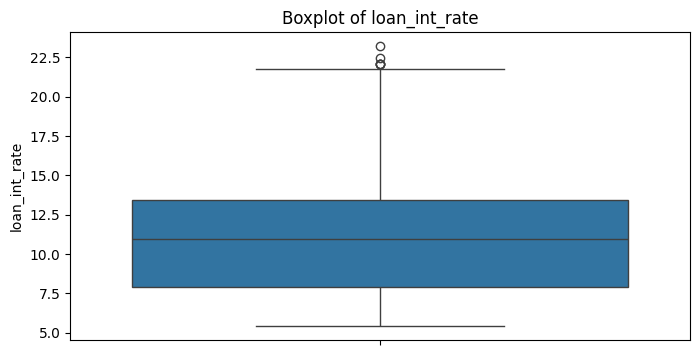

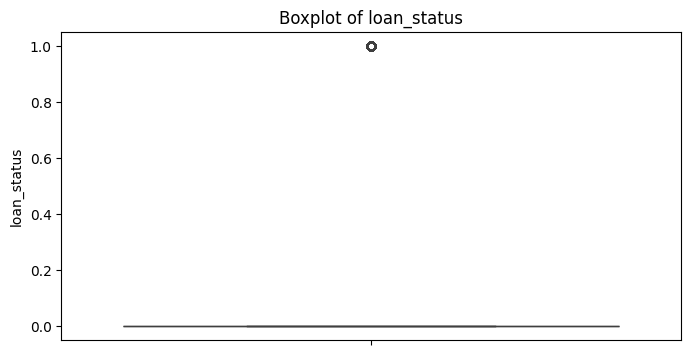

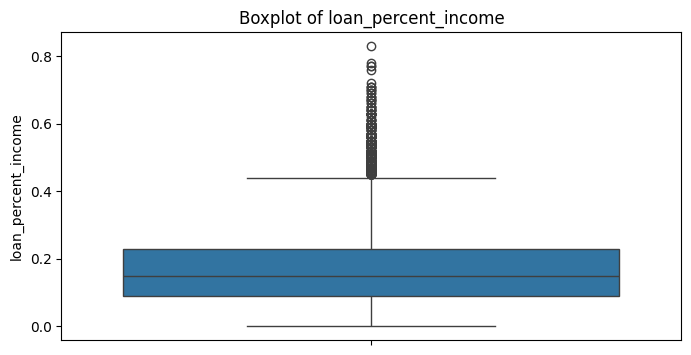

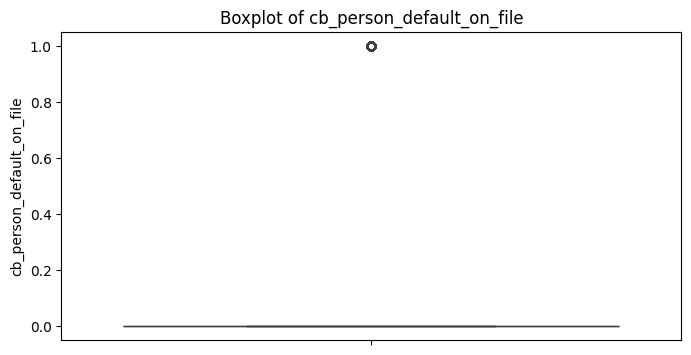

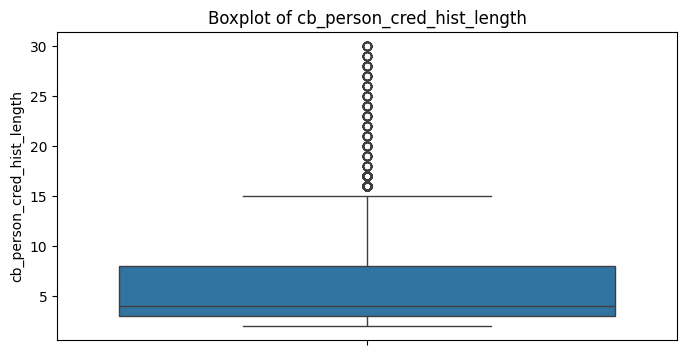

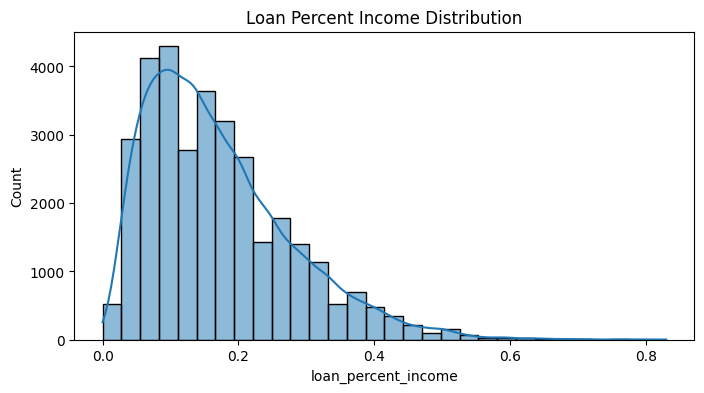

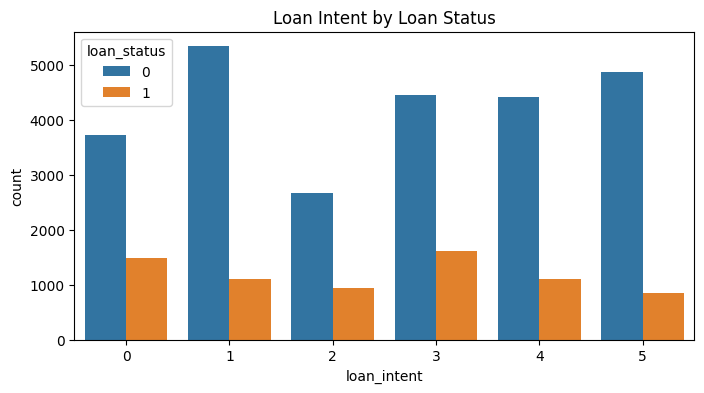

In [13]:
# Basic overview
print("dfset Info:")
print(df.info())
print("\nSummary Statistics:")
print(df.describe())

# Handle missing values
missing_values = df.isnull().sum()
print("\nMissing Values:")
print(missing_values[missing_values > 0])

# Distribution of numerical features
num_columns = df.select_dtypes(include='number').columns
for col in num_columns:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f'Distribution of {col}')
    plt.show()

# Distribution of categorical features
cat_columns = df.select_dtypes(exclude='number').columns
for col in cat_columns:
    plt.figure(figsize=(8, 4))
    sns.countplot(x=df[col])
    plt.title(f'Distribution of {col}')
    plt.show()

# Correlation analysis
plt.figure(figsize=(12, 8))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Bivariate analysis
# Example: Age vs Loan Status
plt.figure(figsize=(8, 4))
sns.boxplot(x=df['loan_status'], y=df['person_age'])
plt.title('Person Age by Loan Status')
plt.show()

# Outliers detection
for col in num_columns:
    plt.figure(figsize=(8, 4))
    sns.boxplot(df[col])
    plt.title(f'Boxplot of {col}')
    plt.show()

# Analysis of Loan Percent Income
plt.figure(figsize=(8, 4))
sns.histplot(df['loan_percent_income'], kde=True, bins=30)
plt.title('Loan Percent Income Distribution')
plt.show()

# Analysis of Loan Intent
plt.figure(figsize=(8, 4))
sns.countplot(x=df['loan_intent'], hue=df['loan_status'])
plt.title('Loan Intent by Loan Status')
plt.show()

In [4]:
# First we get a description of the distribution of data
df.describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,32581.000000,3.258100e+04,31686.000000,32581.000000,29465.000000,32581.000000,32581.000000,32581.000000
mean,27.734600,6.607485e+04,4.789686,9589.371106,11.011695,0.218164,0.170203,5.804211
std,6.348078,6.198312e+04,4.142630,6322.086646,3.240459,0.413006,0.106782,4.055001
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,23.000000,3.850000e+04,2.000000,5000.000000,7.900000,0.000000,0.090000,3.000000
50%,26.000000,5.500000e+04,4.000000,8000.000000,10.990000,0.000000,0.150000,4.000000
75%,30.000000,7.920000e+04,7.000000,12200.000000,13.470000,0.000000,0.230000,8.000000
max,144.000000,6.000000e+06,123.000000,35000.000000,23.220000,1.000000,0.830000,30.000000


In [8]:
# Check for missing values
n_missing_values = df.isnull().sum()
print("\nMissing Values:")
print(n_missing_values)

# Check for duplicates
n_duplicates = df.duplicated().sum()
print("\nNumber of Duplicates:", n_duplicates)


Missing Values:
person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              895
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3116
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64

Number of Duplicates: 165


In [9]:
# There are 3116 missing values and 165 duplicates. We drop those values
df = df.dropna().drop_duplicates()
df.describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,28501.000000,2.850100e+04,28501.000000,28501.000000,28501.000000,28501.000000,28501.000000,28501.000000
mean,27.738676,6.665441e+04,4.790148,9658.533034,11.045385,0.217115,0.169517,5.800498
std,6.316166,6.237603e+04,4.157462,6329.604672,3.230748,0.412289,0.106410,4.042153
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,23.000000,3.950000e+04,2.000000,5000.000000,7.900000,0.000000,0.090000,3.000000
50%,26.000000,5.600000e+04,4.000000,8000.000000,10.990000,0.000000,0.150000,4.000000
75%,30.000000,8.000000e+04,7.000000,12500.000000,13.480000,0.000000,0.230000,8.000000
max,144.000000,6.000000e+06,123.000000,35000.000000,23.220000,1.000000,0.830000,30.000000


In [7]:
# Some of the feautres are labels stored as text
# There is need to encode/enumerate those values

person_home_ownership_encoder = LabelEncoder()
loan_intent_encoder = LabelEncoder()
cb_person_default_on_file_encoder = LabelEncoder()
loan_grade_encoder = LabelEncoder()

df['person_home_ownership'] = person_home_ownership_encoder.fit_transform(df['person_home_ownership'])
df['loan_intent'] = loan_intent_encoder.fit_transform(df['loan_intent'])
df['loan_grade'] = loan_grade_encoder.fit_transform(df['loan_grade'])
df['cb_person_default_on_file'] = cb_person_default_on_file_encoder.fit_transform(df['cb_person_default_on_file'])

df.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,3,123.0,4,3,35000,16.02,1,0.59,1,3
1,21,9600,2,5.0,1,1,1000,11.14,0,0.10,0,2
2,25,9600,0,1.0,3,2,5500,12.87,1,0.57,0,3
3,23,65500,3,4.0,3,2,35000,15.23,1,0.53,0,2
4,24,54400,3,8.0,3,2,35000,14.27,1,0.55,1,4




5. **Hypothesis Testing:**
   - State any preexisting hypotheses about the data.
   - Explain methodologies to empirically test these hypotheses.

   Hypotheses for data
   1. The default rate has a strong correlation to the debt burden. The debt burden in this case is the loan as a percent of income.

    Testing this hypothesis will require computing the covariance of `loan_as_a_percentage_of_income` and `loan_status`.

   2. The correlation of debt burden to default rate is stronger for lower incomes. People with high incomes can afford to use larger portions of their income to pay of debt.




In [12]:
# Calculating the correlation coefficient of loan_percent_income and loan_status to test hypothesis 1
df['loan_percent_income'].corr(df['loan_status'])

0.38000025291817946

This correlation coefficient of 0.38 demonstrates that there is a weak but positive correlation between the two columns.

In [ ]:
# Plotting the distribution of loan_as_a_perce


6. **Handling Sparse/Dense Data and Outliers:**
   - Density of data.
   No columns had sparse data. However a lot of them had dense data. This is listed in the output of the code cell below.

   - Missing Data and Outliers

    - Age: The majority of individuals are in their mid-20s. Outliers include very high ages up to 144 years.
    - Income: Average income is approximately $66,000. There are extreme outliers, with some incomes reaching $6,000,000.

    To solve this problem, I will drop only the age outliers (above 100) and missing data. Since there's a lot of data already, the dropped values represent a small portion of the data, so integrity will be maintained.



   **Insert code for Handling Sparse/Dense Data and Outliers below**

In [15]:
# 1. Define thresholds for sparsity/density
sparse_threshold = 0.2  # Below 20% non-null df is considered sparse
dense_threshold = 0.8  # Above 80% non-null df is considered dense

# 2. Assess sparsity/density of columns
sparsity_density = df.notnull().mean()
sparse_columns = sparsity_density[sparsity_density < sparse_threshold].index.tolist()
dense_columns = sparsity_density[sparsity_density > dense_threshold].index.tolist()

print("Sparse Columns (< 20% density):", sparse_columns)
print("Dense Columns (> 80% density):", dense_columns)

# 3. Handle Sparse data
# Strategy: Drop sparse columns if they're not critical or impute them
df_sanitized = df.drop(columns=sparse_columns, errors='ignore')

# Alternatively, impute sparse df using column-appropriate strategies
for col in sparse_columns:
    if df[col].dtype in ['float64', 'int64']:  # Numerical columns
        df[col] = df[col].fillna(df[col].median())
    else:  # Categorical columns
        df[col] = df[col].fillna(df[col].mode()[0])

# 4. Handle Dense data
# Strategy: Check for redundancy and high correlations among dense columns
dense_corr = df[dense_columns].corr()

# Identify pairs of dense columns with high correlation (> 0.95)
high_corr_pairs = [
    (col1, col2)
    for col1 in dense_corr.columns
    for col2 in dense_corr.columns
    if col1 != col2 and abs(dense_corr[col1][col2]) > 0.95
]

print("Highly Correlated Dense Columns:", high_corr_pairs)

# Drop one column from highly correlated pairs to reduce redundancy
for col1, col2 in high_corr_pairs:
    if col1 in df.columns:
        df.drop(columns=[col2], inplace=True)

# 5. Verify updated sparsity/density
updated_sparsity_density = df.notnull().mean()
print("\nUpdated Column Densities:")
print(updated_sparsity_density)

# 6. Drop missing values and age outliers
df = df.dropna()
df = df.drop(df[df['person_age'] > 100].index)

# Output dfset after handling sparsity/density
df.head()

Sparse Columns (< 20% density): []
Dense Columns (> 80% density): ['person_age', 'person_income', 'person_home_ownership', 'person_emp_length', 'loan_intent', 'loan_grade', 'loan_amnt', 'loan_int_rate', 'loan_status', 'loan_percent_income', 'cb_person_default_on_file', 'cb_person_cred_hist_length']
Highly Correlated Dense Columns: []

Updated Column Densities:
person_age                    1.0
person_income                 1.0
person_home_ownership         1.0
person_emp_length             1.0
loan_intent                   1.0
loan_grade                    1.0
loan_amnt                     1.0
loan_int_rate                 1.0
loan_status                   1.0
loan_percent_income           1.0
cb_person_default_on_file     1.0
cb_person_cred_hist_length    1.0
dtype: float64


,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,3,123.0,4,3,35000,16.02,1,0.59,1,3
1,21,9600,2,5.0,1,1,1000,11.14,0,0.10,0,2
2,25,9600,0,1.0,3,2,5500,12.87,1,0.57,0,3
3,23,65500,3,4.0,3,2,35000,15.23,1,0.53,0,2
4,24,54400,3,8.0,3,2,35000,14.27,1,0.55,1,4


7. **Data Splitting:**
   - To split the data into train and test data, we can use sklearn.model_selection.train_test_split. For reproducibility, we pass the random_state parameter. We can also specify how much should be used for either training or testing–an 80-20 split between training and testing is usually ideal.
   - Further, we will need to split the data during trainign into validation and training data. This can be done during training by telling passing the validation_split parameter to the fit function. This is true for tensorflow models at least.

8. **Bias Mitigation:**
   - One of the most obvious biases in the data is that the defaults are underrepresented.
   - This could lead to issues during training where a model learns the best way to minimise errors is to classify everything as the most popular class. This model would be insensitive. To address this issue we may use the following techniques:

      **Oversampling and Undersampling:**
      When certain classes are underrepresented, you can apply techniques like SMOTE (Synthetic Minority Oversampling Technique) to create synthetic examples of minority classes. Alternatively, undersampling involves reducing the size of majority class examples to balance the dataset.

      **Re-weighting:**
      Assigning different weights to data points during training ensures better representation of underrepresented classes or groups. This approach helps mitigate bias by making minority class errors more significant during optimization.

      **Date Augmentation**
      Techniques like data augmentation, preprocess the input data to ensure it aligns with fairness objectives.

      **Removing sensitive features**
      For example, removing like gender or race can reduce explicit bias.

      **Regular Monitoring**
      Continuously tracking the model's performance over time is crucial for detecting bias drift, where changes in input data distributions lead to unfair or skewed predictions. This includes monitoring fairness metrics alongside accuracy.



9. **Features for Model Training:**
   - The cell below shows the the correlation heatmap of different features. The target feature in this case is loan_status. Therefore we are interested in how loan_status is affected by other features. The features that are most correlated to loan_status are ranked as follows:

   1. loan_percent_income (0.38)
   2. loan_grade (0.37)
   3. loan_int_rate (0.34)
   4. home_ownership (0.21)
   5. cb_default_on_file (0.18)

   These features are the most appropriate for model training as they affect the loan_status (target) the most.


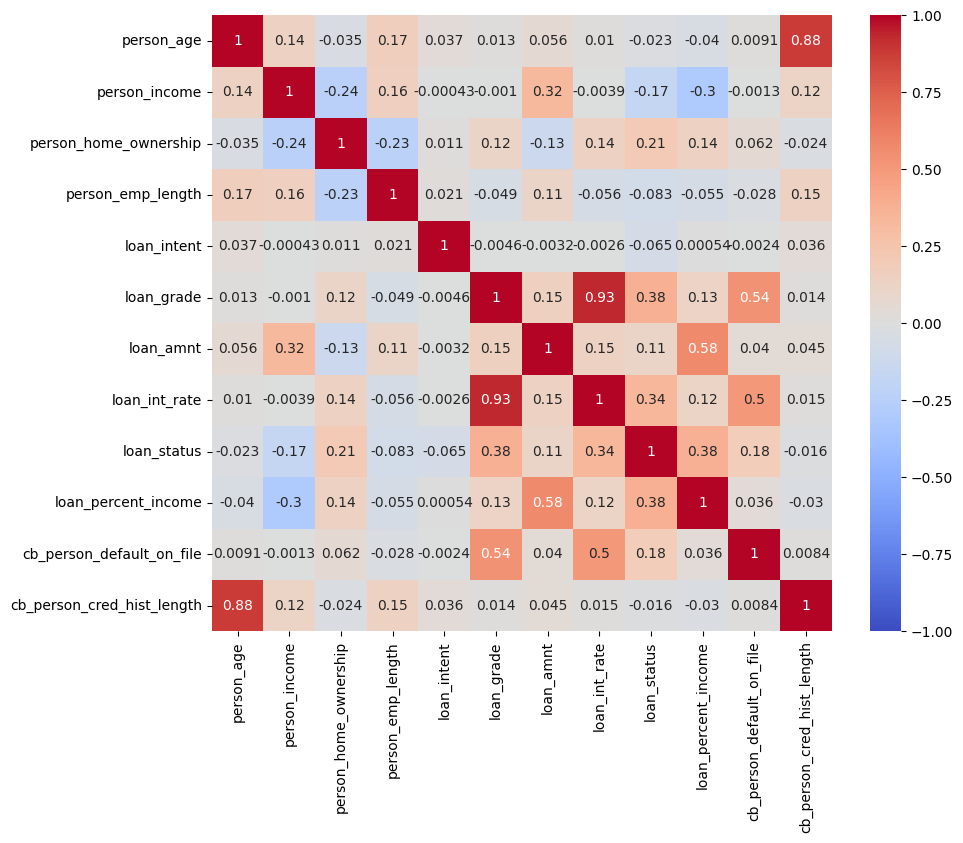

In [16]:
corr = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, vmin=-1, vmax=1, cmap='coolwarm')
plt.show()


10. **Data Transformation for Modeling:**

    For data to be model-friendly, several processing steps have to be taken. These are:
    1. Encode data - Models work only with numerical data. Therefore the categorical features that we had, have to be transformed into labels. This process is known as one-hot encoding. This was done for the loan_grade, home_ownership, loan_intent and cb_person_default_on_file features.
    2. Secondly the data has to be normalised. Gradient descent works better and faster if the data is normalised. There are two techniques for normalisation/scaling. These are:
      - Min-max scaling - This scales data to between 0 and 1. The minimum number is made 0. The maximum number is made 1. Every other number is expressed as a fraction of the maximum. This puts all the variables on the same scale 0-1 scale. However, the data may be unevenly distributed as a result of outliers.
      - Standard Scaling - This shifts and scales the values such that the feature will have a mean of 0 and a standard deviation of 1. This puts values sufficiently close while maintaining a more even distribution. This method carries the benefit of centering the data around zero which is also beneficial for model training.

11. **Data Storage:**
    - The data will be stored in a .csv file to make it easier to read with pandas in future.
    - A .csv file can easily be written into by appending data in batches.
    - The file itself is not very large–only a few kilobytes, therefore the storage options are plenty.
    - For accessibility and security I am going to store it in my Google Drive. This means I can easily share it using a link. I can also easily import it into Colab for building models. It will also be easy to control access as the file is private by default and I can whitelist those I would want to give access.

---

#### Notes:
- This template provides a structured framework for documenting your data processing approach for the portfolio project.
- Fill out each section with specific details relevant to your project's requirements and objectives.
- Use additional cells as needed to provide comprehensive information.